<a href="https://colab.research.google.com/github/CristiSavca/DataScience-MicroCredential/blob/main/Diabetes_Dataset_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview
1) In this notebook, we will explore, analyze, and visualize this diabetes dataset and test which ML model provides the highest accuracy score after training four different models on the data.

Some of the graphs in this notebook were taken from https://www.kaggle.com/code/iabhishekofficial/prediction-on-hospital-readmission

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from copy import copy
import plotly.express as px
import plotly.offline as py
import plotly.graph_objs as go
import plotly.tools as tls
import seaborn as sns

import tensorflow as tf
from tensorflow import keras



df = pd.read_csv('https://raw.githubusercontent.com/CristiSavca/ML_Data/main/diabetic_data.csv')

# EDA

In [2]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 50 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [4]:
df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [5]:
df.isnull().value_counts()

encounter_id  patient_nbr  race   gender  age    weight  admission_type_id  discharge_disposition_id  admission_source_id  time_in_hospital  payer_code  medical_specialty  num_lab_procedures  num_procedures  num_medications  number_outpatient  number_emergency  number_inpatient  diag_1  diag_2  diag_3  number_diagnoses  max_glu_serum  A1Cresult  metformin  repaglinide  nateglinide  chlorpropamide  glimepiride  acetohexamide  glipizide  glyburide  tolbutamide  pioglitazone  rosiglitazone  acarbose  miglitol  troglitazone  tolazamide  examide  citoglipton  insulin  glyburide-metformin  glipizide-metformin  glimepiride-pioglitazone  metformin-rosiglitazone  metformin-pioglitazone  change  diabetesMed  readmitted
False         False        False  False   False  False   False              False                     False                False             False       False              False               False           False            False              False             False             F

In [6]:
df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [7]:
# Count of patients by age
fig = px.histogram(df, x = 'age')
fig.show()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Distribution of Readmission')

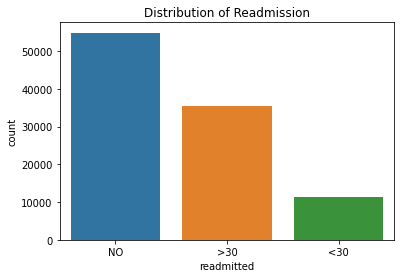

In [8]:
# Distribution of Readmission 
sns.countplot(df['readmitted']).set_title('Distribution of Readmission')

# Data Preparation

In [9]:
df['gender'] = df['gender'].replace(['Male'],'1')
df['gender'] = df['gender'].replace(['Female'],'2')
df['gender'] = df['gender'].replace(['Unknown/Invalid'],'3')

In [10]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,2,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,2,[10-20),?,1,1,7,3,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,2,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,1,[30-40),?,1,1,7,2,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,1,[40-50),?,1,1,7,1,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
df.columns

In [12]:
columns = df.columns

In [ ]:
for i in columns:
    print(i,'has ', set(df[i]))

In [ ]:
df.columns

In [15]:
new_df = df[['race', 'gender', 'age', 'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'number_diagnoses', 'diabetesMed', 'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide',  'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'readmitted']]

In [16]:
len(new_df.columns)

28

In [17]:
# Removing any ? within race
df = df[df['race'] != '?']

# Removing any Unknown/Invalid within gender
df = df[df['gender'] != 'Unknown/Invalid']


In [18]:
for i in new_df:
  new_df[i] = new_df[i].replace(['Up'],'1')
  new_df[i] = new_df[i].replace(['No'],'2')
  new_df[i] = new_df[i].replace(['Steady'],'3')
  new_df[i] = new_df[i].replace(['Down'],'4')
  # Age
  new_df[i] = new_df[i].replace(['[0-10)'],'0')
  new_df[i] = new_df[i].replace(['[10-20)'],'1')
  new_df[i] = new_df[i].replace(['[20-30)'],'2')
  new_df[i] = new_df[i].replace(['[30-40)'],'3')
  new_df[i] = new_df[i].replace(['[40-50)'],'4')
  new_df[i] = new_df[i].replace(['[50-60)'],'5')
  new_df[i] = new_df[i].replace(['[60-70)'],'6')
  new_df[i] = new_df[i].replace(['[70-80)'],'7')
  new_df[i] = new_df[i].replace(['[80-90)'],'8')
  new_df[i] = new_df[i].replace(['[90-100)'],'9')
  # Race
  new_df[i] = new_df[i].replace(['Caucasian'],'1')
  new_df[i] = new_df[i].replace(['AfricanAmerican'],'2')
  new_df[i] = new_df[i].replace(['Hispanic'],'3')
  new_df[i] = new_df[i].replace(['Asian'],'4')
  new_df[i] = new_df[i].replace(['Other'],'5')
  new_df[i] = new_df[i].replace(['?'],'6')
  new_df[i] = new_df[i].replace(['>30'],'0')
  new_df[i] = new_df[i].replace(['<30'],'1')
  new_df[i] = new_df[i].replace(['NO'],'0')
  new_df[i] = new_df[i].replace(['Yes'],'1')

In [19]:
new_df.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,...,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,pioglitazone,rosiglitazone,acarbose,miglitol,readmitted
0,1,2,0,6,25,1,1,41,0,1,...,2,2,2,2,2,2,2,2,2,0
1,1,2,1,1,1,7,3,59,0,18,...,2,2,2,2,2,2,2,2,2,0
2,2,2,2,1,1,7,2,11,5,13,...,2,2,2,3,2,2,2,2,2,0
3,1,1,3,1,1,7,2,44,1,16,...,2,2,2,2,2,2,2,2,2,0
4,1,1,4,1,1,7,1,51,0,8,...,2,2,2,3,2,2,2,2,2,0


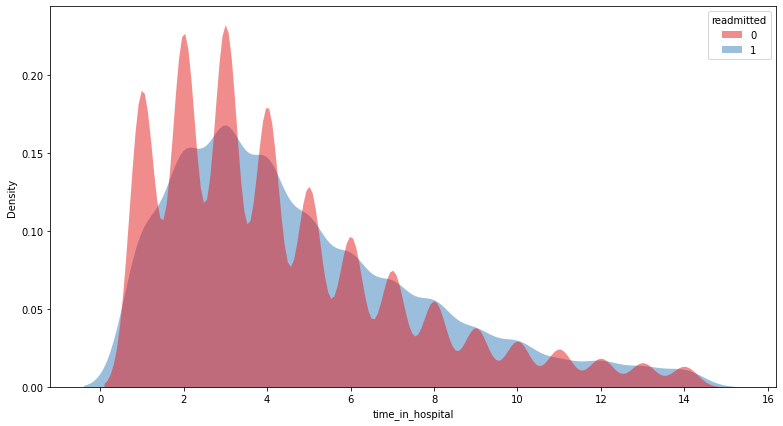

In [20]:
fig = plt.figure(figsize=(13,7))
sns.kdeplot(
   data=new_df, x="time_in_hospital", hue="readmitted",
   shade=True, common_norm=False, palette="Set1",
   alpha=.5, linewidth=0,
)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Diabetes Medication prescribed VS Readmission')

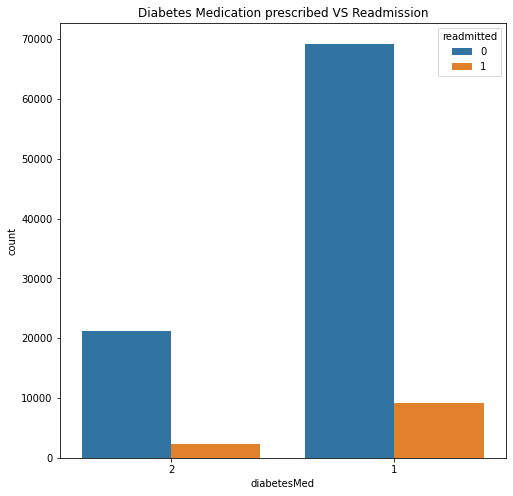

In [21]:
fig = plt.figure(figsize=(8,8))
sns.countplot(new_df['diabetesMed'], hue = new_df['readmitted'], palette='tab10').set_title('Diabetes Medication prescribed VS Readmission')

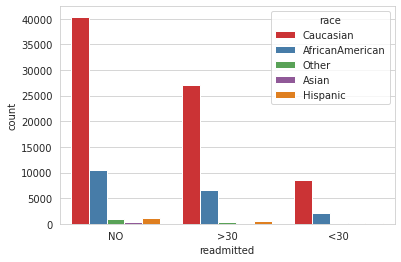

In [22]:
sns.set_style('whitegrid')
sns.countplot(x='readmitted', hue='race', data=df, palette='Set1')

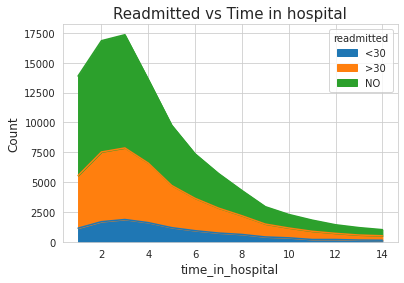

In [23]:
pd.crosstab(df.time_in_hospital,df.readmitted).plot(kind = "area")
plt.title("Readmitted vs Time in hospital", fontsize = 15)
plt.ylabel("Count", fontsize = 12)
plt.xlabel("time_in_hospital",fontsize = 12)
plt.show()

# Build Models

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = new_df.iloc[:,:-1]
X.shape

(101766, 27)

In [26]:
y = new_df.iloc[:,-1]
y.shape

(101766,)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=0)

# Logistic Regression

In [28]:
from sklearn.linear_model import LogisticRegression

In [29]:
classifier = LogisticRegression(random_state=0)

In [30]:
classifier.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=0)

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
predictions = classifier.predict(X_test)

In [33]:
from sklearn.metrics import classification_report

In [34]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29816
           1       0.49      0.02      0.03      3767

    accuracy                           0.89     33583
   macro avg       0.69      0.51      0.49     33583
weighted avg       0.84      0.89      0.84     33583



# KNN

In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
knn = KNeighborsClassifier(n_neighbors=30)

In [37]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=30)

In [38]:
pred = knn.predict(X_test)

In [39]:
from sklearn.metrics import classification_report, confusion_matrix

In [40]:
print(confusion_matrix(y_test, pred))

[[29813     3]
 [ 3764     3]]


In [41]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29816
           1       0.50      0.00      0.00      3767

    accuracy                           0.89     33583
   macro avg       0.69      0.50      0.47     33583
weighted avg       0.84      0.89      0.84     33583



# Decision Tree

In [42]:
from sklearn.tree import DecisionTreeClassifier

In [43]:
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)

DecisionTreeClassifier()

In [44]:
from sklearn.metrics import classification_report, confusion_matrix

In [45]:
predictions = dtree.predict(X_test)

In [46]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88     29816
           1       0.16      0.19      0.17      3767

    accuracy                           0.80     33583
   macro avg       0.53      0.53      0.53     33583
weighted avg       0.81      0.80      0.80     33583



In [47]:
print(confusion_matrix(y_test,predictions))

[[26041  3775]
 [ 3069   698]]


                     Feature  Importance
4   discharge_disposition_id    0.034838
3          admission_type_id    0.034864
12          number_inpatient    0.035059
5        admission_source_id    0.035801
13          number_diagnoses    0.052084
8             num_procedures    0.064505
2                        age    0.070010
6           time_in_hospital    0.094351
9            num_medications    0.151448
7         num_lab_procedures    0.181209


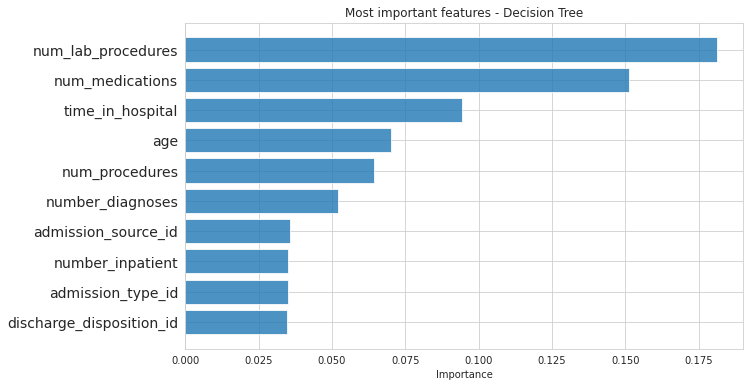

In [48]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = dtree.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
print(most_imp_features)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Decision Tree')
plt.show()

# Random Forest Model

In [49]:
from sklearn.ensemble import RandomForestClassifier

In [50]:
rf = RandomForestClassifier(n_estimators = 600)
rf.fit(X_train,y_train)

RandomForestClassifier(n_estimators=600)

In [51]:
predictions_rfc = rf.predict(X_test)

In [52]:
print(classification_report(y_test, predictions_rfc))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94     29816
           1       0.45      0.01      0.02      3767

    accuracy                           0.89     33583
   macro avg       0.67      0.50      0.48     33583
weighted avg       0.84      0.89      0.84     33583



In [53]:
print(confusion_matrix(y_test,predictions))

[[26041  3775]
 [ 3069   698]]


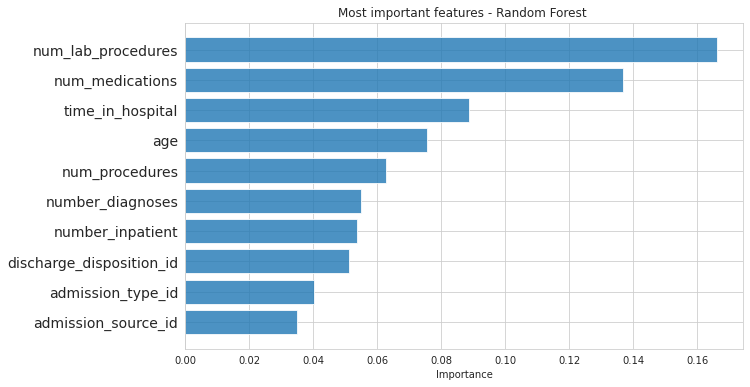

In [55]:
# Create list of top most features based on importance
feature_names = X_train.columns
feature_imports = rf.feature_importances_
most_imp_features = pd.DataFrame([f for f in zip(feature_names,feature_imports)], columns=["Feature", "Importance"]).nlargest(10, "Importance")
most_imp_features.sort_values(by="Importance", inplace=True)
plt.figure(figsize=(10,6))
plt.barh(range(len(most_imp_features)), most_imp_features.Importance, align='center', alpha=0.8)
plt.yticks(range(len(most_imp_features)), most_imp_features.Feature, fontsize=14)
plt.xlabel('Importance')
plt.title('Most important features - Random Forest ')
plt.show()

# Model Comparison

Changing the dataset to increase the recall score is beyond the scope of this notebook, therefore we are ultimately left with a high score of 0.89 accuracy from the Random Forest Model, which performed the best compared to the other 3 models in predicting whether a patient was readmitted to a hospital within 30 days.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:24: MatplotlibDeprecationWarning:

Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.



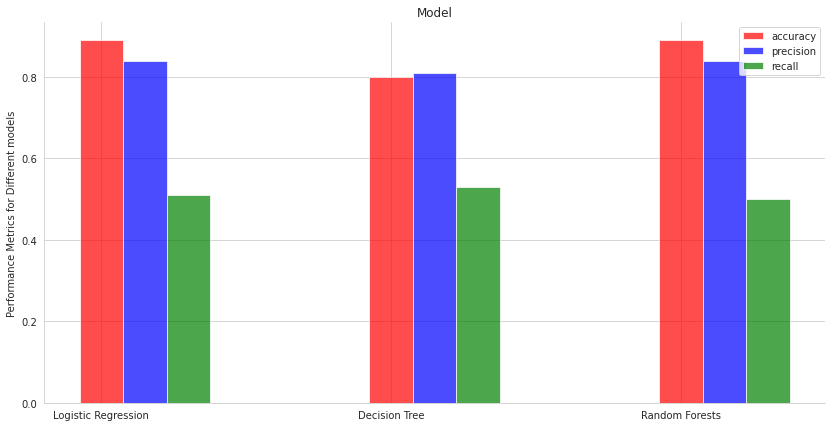

In [57]:
plt.figure(figsize=(14, 7))
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [0.89, 0.80, 0.89]
model = np.arange(len(models))

plt.bar(model, values, align='center', width = 0.15, alpha=0.7, color = 'red', label= 'accuracy')
plt.xticks(model, models)
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests']
values = [0.84, 0.81, 0.84]
model = np.arange(len(models))

plt.bar(model+0.15, values, align='center', width = 0.15, alpha=0.7, color = 'blue', label = 'precision')
plt.xticks(model, models)
ax = plt.subplot(111)

models = ['Logistic Regression', 'Decision Tree', 'Random Forests' ]
values = [0.51, 0.53, 0.50, ]
model = np.arange(len(models))

plt.bar(model+0.3, values, align='center', width = 0.15, alpha=0.7, color = 'green', label = 'recall')
plt.xticks(model, models)

plt.ylabel('Performance Metrics for Different models')
plt.title('Model')
# removing the axis on the top and right of the plot window
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.legend()
plt.show()